In [305]:
#import necessary libriaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime

In [306]:
users = pd.read_csv('E:/DS/repo/SpringboardRepo/relax_challenge/takehome_users.csv',engine='python')

In [307]:
users_eng = pd.read_csv('E:/DS/repo/SpringboardRepo/relax_challenge/takehome_user_engagement.csv')

## General view of the data

In [308]:
users.head(5)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [309]:
users_eng .head(5)

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [310]:
users.info(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [311]:
users.shape

(12000, 10)

In [312]:
users_eng.shape

(207917, 3)

No missing data

## Identify the adopted users

In [313]:
users_eng.time_stamp = pd.to_datetime(users_eng.time_stamp, format='%Y-%m-%d %H:%M:%S')

In [314]:
users_eng.head(5)

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [315]:
# define a function to determine whether a user logged in on 3 seperate days in a 7-day period.
def logins_users(df, days=7, logins=3):
    from datetime import timedelta
    # first drop duplicate days and sort by day
    df['date'] = df['time_stamp'].dt.date
    df = df.drop_duplicates(subset='date').sort_values('date')
    # calculate how many days has passed for every 3 logins
    passed_days = df['date'].diff(periods=logins-1)
    # check if any passed time is less than 7 days
    return any(passed_days <= timedelta(days=days))

In [316]:
adopted = users_eng.groupby('user_id').apply(logins_users)
adopted.name = 'adopted_user'

In [317]:
adopted

user_id
1        False
2         True
3        False
4        False
5        False
         ...  
11996    False
11997    False
11998    False
11999    False
12000    False
Name: adopted_user, Length: 8823, dtype: bool

In [318]:
print('{} users adopted it. The proportion is {}'.format(sum(adopted),'%.2f%%' %(sum(adopted)/8823*100)))

1656 users adopted it. The proportion is 18.77%


## Data Cleaning and Combination

In [319]:
users.creation_time = pd.to_datetime(users.creation_time)

In [320]:
users['last_session_creation_time'] = users['last_session_creation_time'].map(lambda data: 
                                    datetime.datetime.fromtimestamp(int(data)).strftime('%Y-%m-%d %H:%M:%S'),
                                                                              na_action='ignore')

In [321]:
users.last_session_creation_time= pd.to_datetime(users.last_session_creation_time)

In [322]:
users['history'] = (users['last_session_creation_time'] - users['creation_time']).dt.days

In [323]:
users['account_age'] = (max(users['creation_time'])- users['creation_time']).dt.days

In [324]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,history,account_age
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-21 21:53:30,1,0,11,10803.0,-1.0,38
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-30 21:45:04,0,0,1,316.0,135.0,196
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 17:14:52,0,0,94,1525.0,-1.0,437
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 02:09:28,0,0,1,5151.0,0.0,374
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 04:14:20,0,0,193,5240.0,4.0,498


In [325]:
users = users.set_index('object_id')

In [326]:
df = pd.concat([users, adopted], axis=1, join='inner')

In [327]:
df.index.name = 'user_id'
drop_columns=['name','email','org_id','invited_by_user_id']


In [328]:
df.drop(columns=drop_columns)

,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,history,account_age,adopted_user
user_id,,,,,,,,
1,2014-04-22 03:53:30,GUEST_INVITE,2014-04-21 21:53:30,1,0,-1.0,38,False
2,2013-11-15 03:45:04,ORG_INVITE,2014-03-30 21:45:04,0,0,135.0,196,True
3,2013-03-19 23:14:52,ORG_INVITE,2013-03-19 17:14:52,0,0,-1.0,437,False
4,2013-05-21 08:09:28,GUEST_INVITE,2013-05-22 02:09:28,0,0,0.0,374,False
5,2013-01-17 10:14:20,GUEST_INVITE,2013-01-22 04:14:20,0,0,4.0,498,False
...,...,...,...,...,...,...,...,...
11996,2013-09-06 06:14:15,ORG_INVITE,2013-09-06 00:14:15,0,0,-1.0,266,False
11997,2013-01-10 18:28:37,SIGNUP_GOOGLE_AUTH,2013-01-15 12:28:37,0,0,4.0,505,False
11998,2014-04-27 12:45:16,GUEST_INVITE,2014-04-27 06:45:16,1,1,-1.0,33,False


## Data Analysis

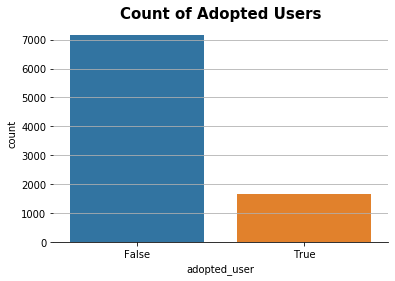

In [351]:
sns.countplot(x='adopted_user', data=df)
plt.title('Count of Adopted Users',weight='bold').set_fontsize('15')
plt.grid(axis="y")
sns.despine(left=True)
plt.show()

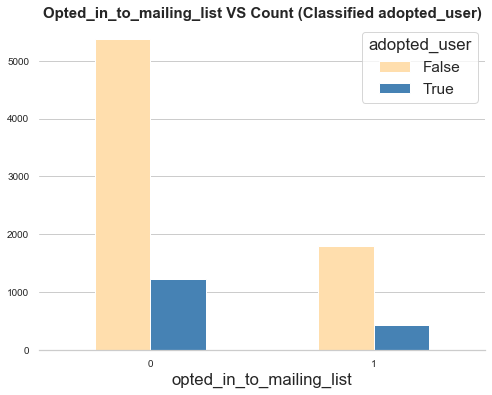

In [379]:
df_feature=df.groupby(['opted_in_to_mailing_list','adopted_user'])['opted_in_to_mailing_list'].count().sort_values(ascending=False)

df_feature.unstack().plot(kind='bar',figsize=(8,6),fontsize= 10,color=['navajowhite','steelblue'])
plt.title(('opted_in_to_mailing_list').capitalize()+' VS Count (Classified adopted_user)',weight='bold').set_fontsize('15')
plt.xticks(rotation= 0)
    
plt.grid(axis="x")
sns.despine(left=True)
plt.show()

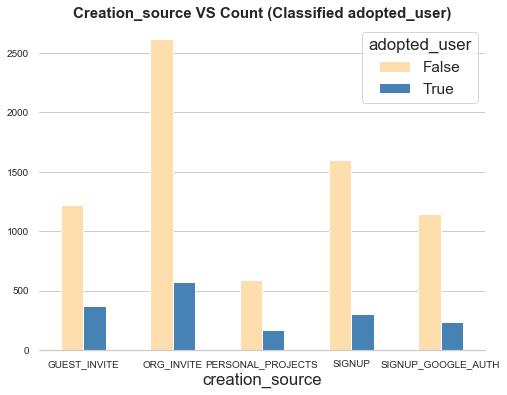

In [381]:
df_feature=df.groupby(['creation_source','adopted_user'])['creation_source'].count().sort_values(ascending=False)

df_feature.unstack().plot(kind='bar',figsize=(8,6),fontsize= 10,color=['navajowhite','steelblue'])
plt.title(('creation_source').capitalize()+' VS Count (Classified adopted_user)',weight='bold').set_fontsize('15')
plt.xticks(rotation= 0)
    
plt.grid(axis="x")
sns.despine(left=True)
plt.show()

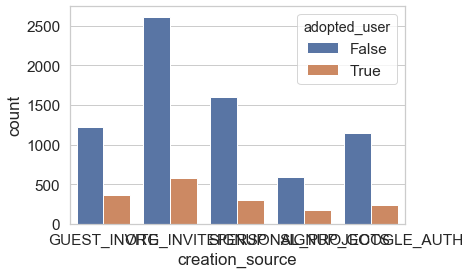

In [376]:
sns.countplot(x='creation_source', data=df, hue='adopted_user')

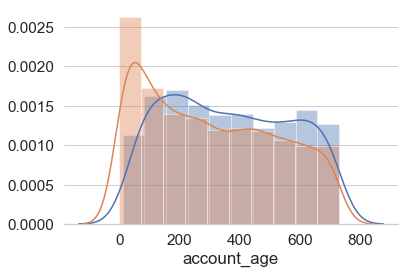

In [377]:
sns.set(style ='whitegrid',font_scale=1.4)

data1=df[df['adopted_user']==True]['account_age']
data2=df[df['adopted_user']==False]['account_age']

ax1=sns.distplot(data1,bins=10)
ax2=sns.distplot(data2,bins=10)

plt.xticks(rotation= 0)

plt.grid(axis="x")
sns.despine(left=True)
plt.show()

In [387]:
x=df.groupby(['adopted_user'])['account_age'].mean().sort_values(ascending=False)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

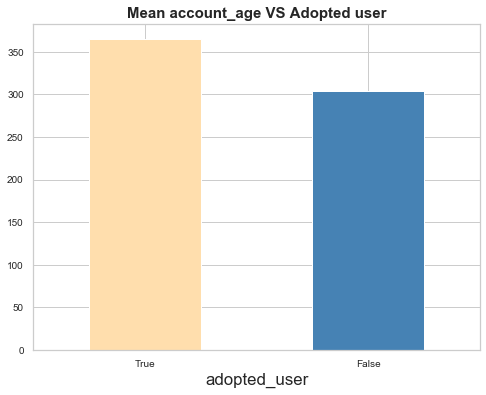

In [392]:
x.plot(kind='bar',figsize=(8,6),fontsize= 10,color=['navajowhite','steelblue'])
plt.title('Mean account_age VS Adopted user',weight='bold').set_fontsize('15')
plt.xticks(rotation= 0)

## Modeling

In [393]:

from sklearn.model_selection import train_test_split as split
import warnings
from sys import modules
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [478]:
data_learn=df

In [479]:
label_encoder = preprocessing.LabelEncoder()

In [482]:
for i in data_learn.columns:
    if data_learn[i].dtype=='object':
        data_learn[i]= label_encoder.fit_transform(data_learn[i])

In [483]:
data_learn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8823 entries, 1 to 12000
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   creation_time               8823 non-null   int32         
 1   name                        8823 non-null   int32         
 2   email                       8823 non-null   int32         
 3   creation_source             8823 non-null   int32         
 4   last_session_creation_time  8823 non-null   datetime64[ns]
 5   opted_in_to_mailing_list    8823 non-null   int64         
 6   enabled_for_marketing_drip  8823 non-null   int64         
 7   org_id                      8823 non-null   int64         
 8   invited_by_user_id          4776 non-null   float64       
 9   history                     8823 non-null   float64       
 10  account_age                 8823 non-null   int64         
 11  adopted_user                8823 non-null   int64      

In [485]:
data_learn['last_session_creation_time']=pd.to_numeric(data_learn['last_session_creation_time'], downcast='float')

In [494]:
data_learn.invited_by_user_id=data_learn.invited_by_user_id.fillna(data_learn.invited_by_user_id.mode()[0])

In [495]:
data_learn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8823 entries, 1 to 12000
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   creation_time               8823 non-null   int32  
 1   name                        8823 non-null   int32  
 2   email                       8823 non-null   int32  
 3   creation_source             8823 non-null   int32  
 4   last_session_creation_time  8823 non-null   float32
 5   opted_in_to_mailing_list    8823 non-null   int64  
 6   enabled_for_marketing_drip  8823 non-null   int64  
 7   org_id                      8823 non-null   int64  
 8   invited_by_user_id          8823 non-null   float64
 9   history                     8823 non-null   float64
 10  account_age                 8823 non-null   int64  
 11  adopted_user                8823 non-null   int64  
dtypes: float32(1), float64(2), int32(4), int64(5)
memory usage: 1.0 MB


In [496]:
data_learn

,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,history,account_age,adopted_user
user_id,,,,,,,,,,,,
1,7963,1562,778,0,1.398117e+18,1,0,11,10803.0,-1.0,38,0
2,5590,6280,5439,1,1.396216e+18,0,0,1,316.0,135.0,196,1
3,2855,959,5733,1,1.363713e+18,0,0,94,1525.0,-1.0,437,0
4,3528,1570,5949,0,1.369189e+18,0,0,1,5151.0,0.0,374,0
5,2190,6447,2760,0,1.358828e+18,0,0,193,5240.0,4.0,498,0
...,...,...,...,...,...,...,...,...,...,...,...,...
11996,4721,5282,7111,1,1.378426e+18,0,0,89,8263.0,-1.0,266,0
11997,2126,2602,402,4,1.358253e+18,0,0,200,4612.0,4.0,505,0
11998,8052,3387,3213,0,1.398581e+18,1,1,83,8074.0,-1.0,33,0


In [497]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [498]:
X= data_learn.drop('adopted_user',axis=1)
y= data_learn.adopted_user

In [499]:
models= [("Dummy", DummyClassifier()),("Random Forest", RandomForestClassifier()),('xgboost',xgb.XGBClassifier())]

C:\Users\FYsophia\anaconda3\lib\site-packages\sklearn\dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


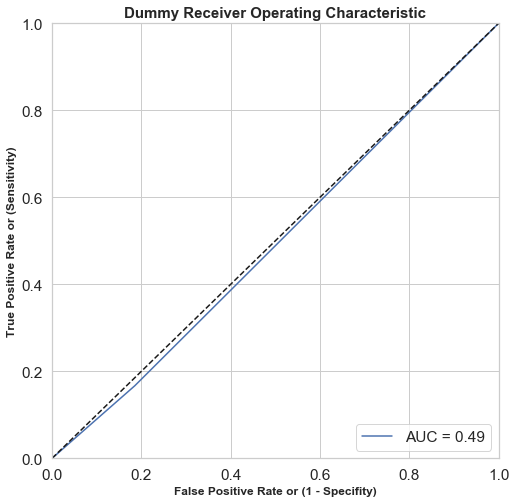

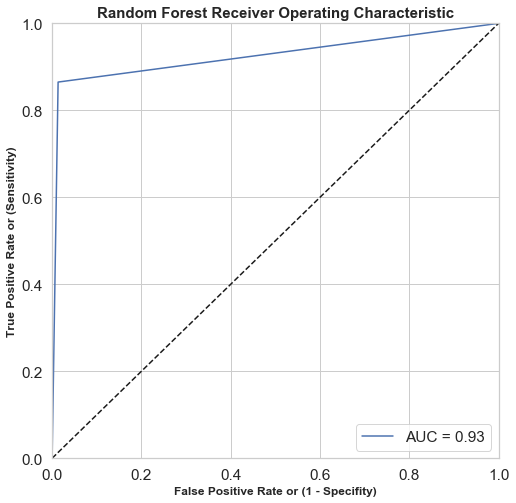

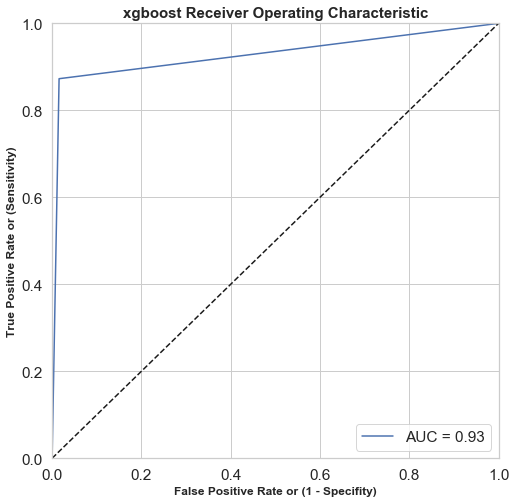

In [500]:
auc_score_list=[]
model_name_list=[]
fpr_list=[]
tpr_list=[]

for name,model in models:
    #split data set
    X_train, X_test,y_train, y_test=train_test_split(X,y,train_size=0.3, random_state=42)
    modeling=model
    modeling.fit(X_train, y_train)
    y_predict=modeling.predict(X_test)
    #compute auc
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict)
    auc=metrics.auc(fpr, tpr)
    auc_score_list.append(auc)
    model_name_list.append(name)
    
    plt.figure(figsize=(8,8))
    plt.plot(fpr, tpr,label = 'AUC = %0.2f' % auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)',weight='bold').set_fontsize('12')
    plt.ylabel('True Positive Rate or (Sensitivity)',weight='bold').set_fontsize('12')
    plt.title(name+' Receiver Operating Characteristic',weight='bold').set_fontsize('15')


In [501]:
#compute accuracy_score
accuracy_score_list=[]
model_name=[]
for name,model in models:
    X_train, X_test,y_train, y_test=train_test_split(X,y,train_size=0.3, random_state=42)
    modeling=model
    modeling.fit(X_train, y_train)
    y_predict=modeling.predict(X_test)
    #calculate accuracy_score
    test_accuracy_score= accuracy_score(y_test, y_predict.round())
    #cross validation score
    accuracy_score_list.append(test_accuracy_score)
    model_name.append(name)

C:\Users\FYsophia\anaconda3\lib\site-packages\sklearn\dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


In [503]:
accuracy_score_model=pd.DataFrame(data=dict(zip(model_name, accuracy_score_list)), index=[0])

accuracy_score_model

,Dummy,Random Forest,xgboost
0,0.700502,0.963089,0.963413


In [505]:
model_name=[]
for name,model in models:
    model_name.append(name)
    
cross_validation_df = pd.DataFrame(columns=model_name)

for name,model in models:
    kfolds = 5
    split = KFold(n_splits=kfolds, shuffle=True, random_state=42)
    cross_validation_df[name]=cross_val_score(model, X, y, cv=split)
    
cross_validation_df
cross_validation_df.describe()

C:\Users\FYsophia\anaconda3\lib\site-packages\sklearn\dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


,Dummy,Random Forest,xgboost
count,5.000000,5.000000,5.000000
mean,0.692510,0.963731,0.963505
std,0.013026,0.002600,0.002252
min,0.674221,0.959751,0.960884
25%,0.683853,0.963173,0.962040
50%,0.697846,0.963739,0.963173
75%,0.701416,0.965439,0.964873
max,0.705215,0.966553,0.966553


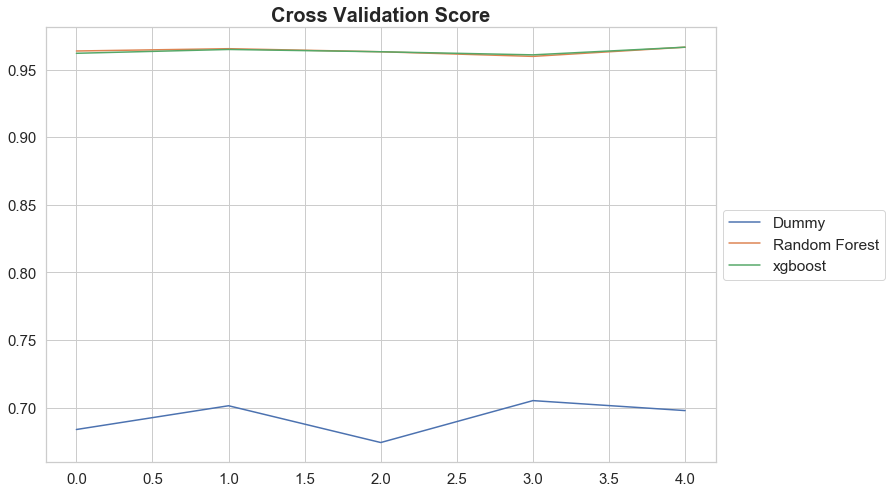

In [506]:
for i in range(len(cross_validation_df.columns)):
    
    cross_validation_df[cross_validation_df.columns[i]].plot(kind='line',figsize=(12,8),fontsize= 15)
    
    plt.title( 'Cross Validation Score',weight='bold').set_fontsize('20')
    
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [507]:

feat_labels = data_learn.columns[1:]
feat_labels

Index(['name', 'email', 'creation_source', 'last_session_creation_time',
       'opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'org_id',
       'invited_by_user_id', 'history', 'account_age', 'adopted_user'],
      dtype='object')

In [508]:
importances = modeling.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    nm=("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))
    print(nm)

 1) account_age                    0.747926
 2) last_session_creation_time     0.043706
 3) opted_in_to_mailing_list       0.035943
 4) creation_source                0.033791
 5) invited_by_user_id             0.033573
 6) name                           0.031914
 7) email                          0.030747
 8) history                        0.028360
 9) enabled_for_marketing_drip     0.014039
10) adopted_user                   0.000000
11) org_id                         0.000000
